In [ ]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Getting dataframe from csv file
df = pd.read_csv("movie_data.csv")
pd.set_option('display.max_columns', None)
display(df.head())

,Title,Release Date,Inflation Adjusted Domestic Revenue,Domestic Revenue,International Revenue,Total Box Office Revenue,Domestic Video Revenue,Opening Weekend,Production Budget,Theater Number,MPAA Rating,Runtime,Genre,Franchise,Production Method,Video Release Date,Domestic DVD Revenue,Domestic Bluray Revenue,Month,Year,Season,Profit
0,Ride Along,2014-01-17,185781023.0,134202565.0,19531235.0,153733800.0,32235491.0,41516170.0,25000000.0,2867.0,PG,100.0,Comedy,Ride Along,Live Action,2014-04-15,21354607.0,10880884.0,1.0,2014.0,Winter,128733800.0
1,Endless Love,1981-07-17,134255389.0,33000000.0,NaN,NaN,NaN,4162921.0,NaN,632.0,R,116.0,Drama,NaN,Live Action,2015-01-13,NaN,NaN,7.0,1981.0,Summer,NaN
2,Blackfish,2013-07-19,2884649.0,2073582.0,281293.0,2354875.0,1885360.0,75962.0,NaN,99.0,PG,83.0,Documentary,NaN,Live Action,2013-11-12,1654556.0,230804.0,7.0,2013.0,Summer,NaN
3,Non-Stop,2000-11-10,80663.0,38442.0,NaN,NaN,NaN,23402.0,NaN,16.0,Not Rated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,2000.0,Fall,NaN
4,Neighbors,1981-12-18,120158888.0,29916207.0,NaN,NaN,36651.0,6481386.0,NaN,1415.0,R,94.0,Black Comedy,NaN,Live Action,2019-03-12,NaN,36651.0,12.0,1981.0,Winter,NaN


In [ ]:
#check correlation between the different earnings
df.corr(numeric_only=True)

#domestic revenue, international revenue, total box revenue, and domestic video revenue, are all strongly correlated (between0.9 and 0.8)
# thus we dont need to do analysis for all of them one will strongly correlate with another but a graph to show which would be good.

,Inflation Adjusted Domestic Revenue,Domestic Revenue,International Revenue,Total Box Office Revenue,Domestic Video Revenue,Opening Weekend,Production Budget,Theater Number,Runtime,Domestic DVD Revenue,Domestic Bluray Revenue,Month,Year,Profit
Inflation Adjusted Domestic Revenue,1.000000,0.975110,0.836626,0.917682,0.824861,0.941252,0.503079,0.532143,0.126618,0.790977,0.846820,-0.197193,-0.113612,0.924296
Domestic Revenue,0.975110,1.000000,0.837472,0.926179,0.753934,0.947685,0.528931,0.567998,0.162647,0.720812,0.782176,-0.202652,0.052562,0.925605
International Revenue,0.836626,0.837472,1.000000,0.981861,0.735292,0.860262,0.684599,0.501421,0.172343,0.690381,0.764956,-0.163186,-0.004742,0.962104
Total Box Office Revenue,0.917682,0.926179,0.981861,1.000000,0.757526,0.923341,0.656671,0.542706,0.170479,0.717074,0.787203,-0.178901,-0.012564,0.988946
Domestic Video Revenue,0.824861,0.753934,0.735292,0.757526,1.000000,0.801758,0.444480,0.404567,0.061981,0.978516,0.987589,-0.133144,-0.096756,0.750298
Opening Weekend,0.941252,0.947685,0.860262,0.923341,0.801758,1.000000,0.562936,0.590453,0.191562,0.761500,0.828667,-0.212095,0.067967,0.915757
Production Budget,0.503079,0.528931,0.684599,0.656671,0.444480,0.562936,1.000000,0.530761,0.349622,0.358193,0.495292,-0.067356,0.133103,0.537585
Theater Number,0.532143,0.567998,0.501421,0.542706,0.404567,0.590453,0.530761,1.000000,0.201361,0.387164,0.413984,-0.324802,0.280692,0.528074
Runtime,0.126618,0.162647,0.172343,0.170479,0.061981,0.191562,0.349622,0.201361,1.000000,0.003552,0.086871,0.144833,0.201906,0.127665
Domestic DVD Revenue,0.790977,0.720812,0.690381,0.717074,0.978516,0.761500,0.358193,0.387164,0.003552,1.000000,0.934125,-0.146919,-0.345954,0.719045


(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(-20.0, 0, '2023-04-14'),
  Text(0.0, 0, '1978-10-17'),
  Text(20.0, 0, '2014-08-29'),
  Text(40.0, 0, '2015-11-13'),
  Text(60.0, 0, '2017-01-27'),
  Text(80.0, 0, '2018-12-14'),
  Text(100.0, 0, '2021-11-26'),
  Text(120.0, 0, '2023-02-24'),
  Text(140.0, 0, '2024-10-11'),
  Text(160.0, 0, '')])

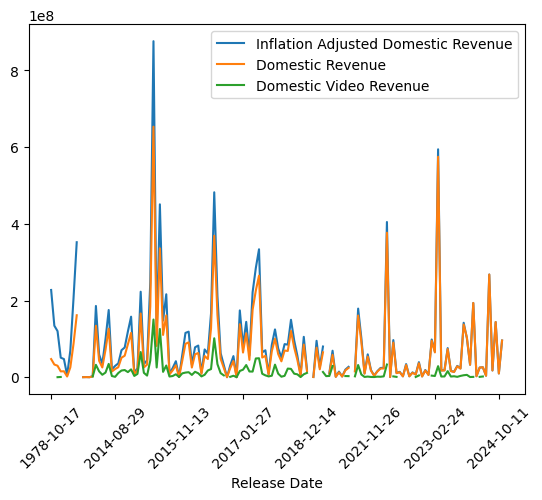

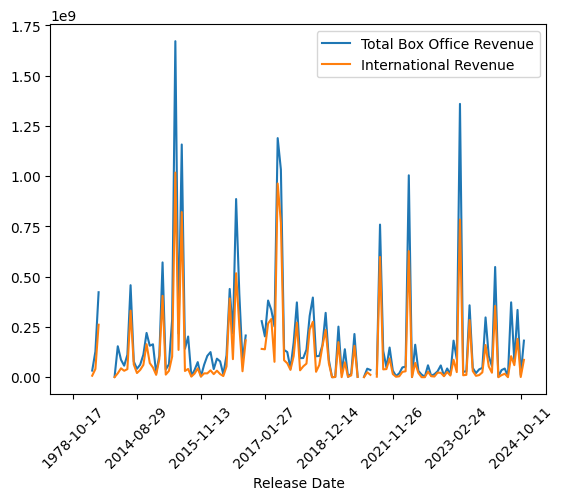

In [ ]:
# graph of the revenues
mean_of = pd.DataFrame()

mean_of = df.groupby('Release Date')[['Inflation Adjusted Domestic Revenue','Domestic Revenue', 'Total Box Office Revenue','International Revenue','Domestic Video Revenue']].mean()
# 'Total Box Office Revenue','International Revenue',

mean_of[['Inflation Adjusted Domestic Revenue','Domestic Revenue','Domestic Video Revenue']].plot()
plt.xticks(rotation=45)

mean_of[['Total Box Office Revenue','International Revenue']].plot()
plt.xticks(rotation=45)

# the graphs show the correlations  and the difference in there earnings


In [ ]:
# checking data 
len(df)
#212
df['Inflation Adjusted Domestic Revenue'].describe()



count    1.880000e+02
mean     9.136012e+07
std      1.252485e+08
min      4.320000e+03
25%      1.313227e+07
50%      5.405076e+07
75%      1.108559e+08
max      8.763738e+08
Name: Inflation Adjusted Domestic Revenue, dtype: float64

In [7]:
df['Domestic Revenue'].describe()

count    1.880000e+02
mean     7.381784e+07
std      1.044458e+08
min      3.124000e+03
25%      1.141200e+07
50%      4.173810e+07
75%      9.030809e+07
max      6.534066e+08
Name: Domestic Revenue, dtype: float64

In [8]:
df['International Revenue'].describe()

count    1.870000e+02
mean     1.147752e+08
std      2.064936e+08
min      1.259000e+03
25%      7.672701e+06
50%      3.241128e+07
75%      1.016100e+08
max      1.157058e+09
Name: International Revenue, dtype: float64

In [ ]:
# product budget is most strongly correlated with international earnings, this implies that the hight earning movies had the most funding (on average)

# run time isn't strongly correlated with anything but its strongest correlation (0.3) is with product budget, this could mean tha with more budget 
# you make longer movies and there for do better but no definite information on this

#most of the numeric variables seem uninteresting so I will move on

In [ ]:
#describing the columns


In [ ]:
#visualizing data


In [ ]:
#finding correlations


In [ ]:
#checking trends (Ex: Average movie revenue by year)


In [ ]:
#Notes section
#Write here anything you find interesting that you don't print in any of your cells
